In [1]:
import numpy as np
import os
gpu_num = "" # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Import Sionna
try:
    import sionna
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna

# IPython "magic function" for inline plots
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi

Fri Mar  8 20:45:05 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.56       Driver Version: 527.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   52C    P3    22W / 130W |    488MiB /  8192MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
batch_size = 1000 # Number of symbols we want to generate
num_bits_per_symbol = 4 # 16-QAM has four bits per symbol
binary_source = sionna.utils.BinarySource()
b = binary_source([batch_size, num_bits_per_symbol])
b

<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
array([[0., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       ...,
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.]], dtype=float32)>

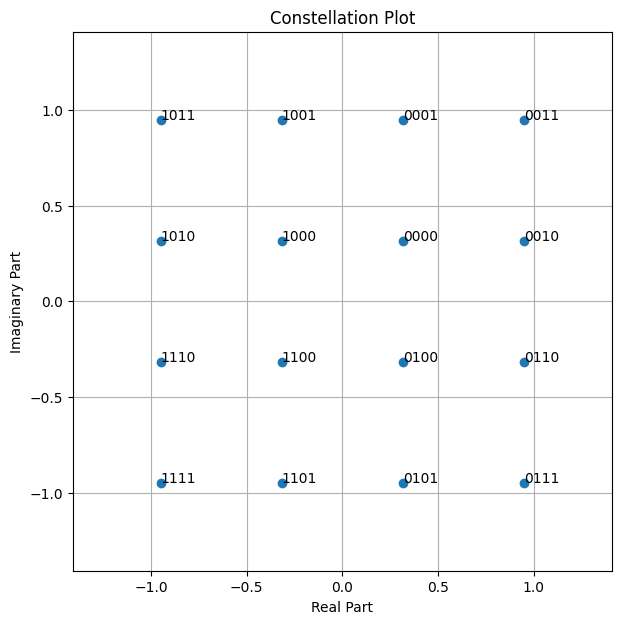

In [4]:
constellation = sionna.mapping.Constellation("qam", num_bits_per_symbol)
constellation.show();

In [5]:
mapper = sionna.mapping.Mapper(constellation=constellation)
x = mapper(b)
x[:10]

<tf.Tensor: shape=(10, 1), dtype=complex64, numpy=
array([[ 0.3162278+0.9486833j],
       [ 0.3162278-0.9486833j],
       [ 0.3162278-0.9486833j],
       [ 0.3162278+0.9486833j],
       [ 0.9486833-0.9486833j],
       [-0.3162278-0.3162278j],
       [-0.9486833-0.9486833j],
       [-0.9486833-0.3162278j],
       [-0.3162278+0.3162278j],
       [-0.3162278-0.3162278j]], dtype=complex64)>

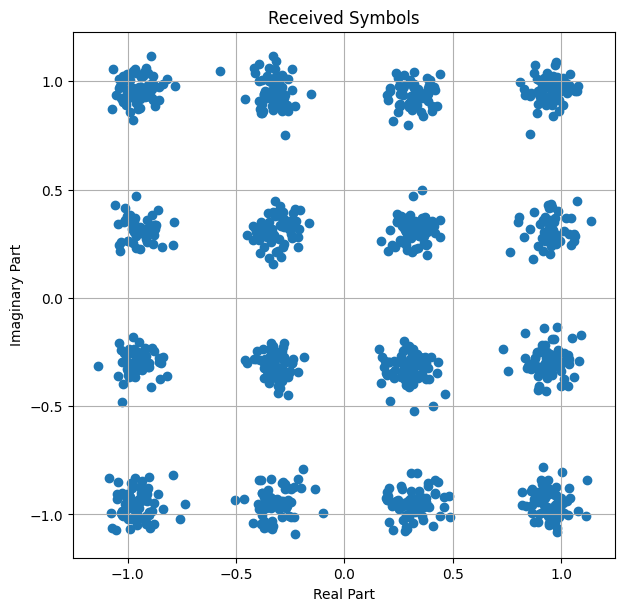

In [6]:
awgn = sionna.channel.AWGN()
ebno_db = 15 # Desired Eb/No in dB
no = sionna.utils.ebnodb2no(ebno_db, num_bits_per_symbol, coderate=1)
y = awgn([x, no])

# Visualize the received signal

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.scatter(np.real(y), np.imag(y));
ax.set_aspect("equal", adjustable="box")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.grid(True, which="both", axis="both")
plt.title("Received Symbols");